In [22]:
# Unidad 4:  Hipótesis y correlación - Sesión 1
## Ejercicio 1: Preparación del ambiente de trabajo

In [23]:
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns


In [24]:
# importamos la base de datos
df = pd.read_csv('nations.csv', encoding= 'latin1')

In [25]:
df

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.000000,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.200000,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.200000,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.200000,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.100000,33.299999
5,6,Cameroon,Africa,1986.800049,5.650000,127.800003,155.00,50.116665,18564118,56.366665,0.6532,NaN,0.750000,NaN
6,7,Cape Verde,Africa,3052.199951,3.500000,81.599998,30.00,73.333336,484867,59.283333,0.6358,84.800003,2.150000,NaN
7,8,Central African Rep,Africa,677.000000,3.383333,106.599998,173.50,45.933334,4203917,38.466667,0.8222,55.200001,0.200000,NaN
8,9,Chad,Africa,1266.199951,1.500000,164.500000,209.00,48.566666,10509983,26.400000,0.8006,33.599998,0.100000,NaN
9,10,Comoros,Africa,1099.000000,2.800000,58.000000,105.75,59.783333,688300,28.000000,0.8554,74.199997,0.400000,NaN


In [26]:
df_subsample= df.loc[:,['country', 'region','chldmort', 'adfert','life']]

In [27]:
df_subsample

,country,region,chldmort,adfert,life
0,Algeria,Africa,34.75,7.300000,72.316666
1,Benin,Africa,122.75,111.699997,54.733334
2,Botswana,Africa,60.25,52.099998,52.250000
3,Burkina Faso,Africa,170.50,124.800003,53.783333
4,Burundi,Africa,168.50,18.600000,48.866665
5,Cameroon,Africa,155.00,127.800003,50.116665
6,Cape Verde,Africa,30.00,81.599998,73.333336
7,Central African Rep,Africa,173.50,106.599998,45.933334
8,Chad,Africa,209.00,164.500000,48.566666
9,Comoros,Africa,105.75,58.000000,59.783333


In [28]:
## Ejercicio 2:A continuación se presenta una serie de gráficos construídos con `matplotlib`. Se le pide refactorizarlos utilizando `seaborn`.

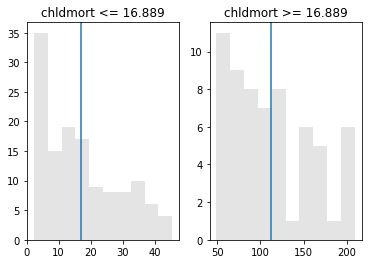

In [29]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))

binarize_histogram(df_subsample, 'chldmort')

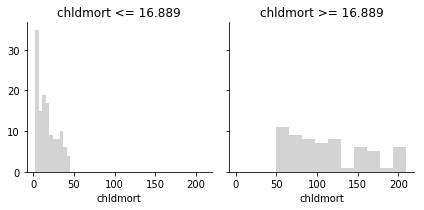

In [30]:
def binarize_histogram_v2(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    ##sns.set(font_scale=1) # Escalamiento de los titulos para que no sean tan grandes
    grid = sns.FacetGrid(tmp, col='binarize', col_wrap=2)
        
    grid = grid.map(plt.hist, variable, color='lightgrey')
    axes = grid.axes.flatten() # Obtener los ejes de ploteo para poder darle titulo a cada grafico
    axes[0].set_title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    axes[1].set_title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    
binarize_histogram_v2(df_subsample, 'chldmort')

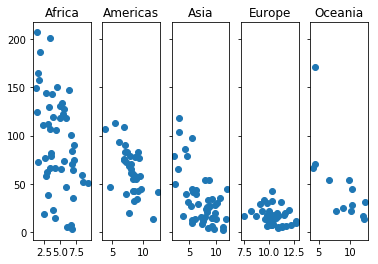

In [31]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
        
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)

grouped_scatterplot(df, 'school', 'adfert', 'region')


In [57]:
def grouped_scatterplot_v2(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
        
    sns.set(font_scale=0.8) # Escalamiento 
    grid = sns.FacetGrid(dataframe, col=group_by, col_wrap = len(stratify_by))
    axes = grid.axes.flatten() # Obtener los ejes de ploteo para poder darle titulo 
    
    #for i, n in enumerate(stratify_by):
     #   axes[i].set_title(stratify_by[i]) 
        
    grid= grid.map(plt.scatter, x, y, alpha=.7)
        

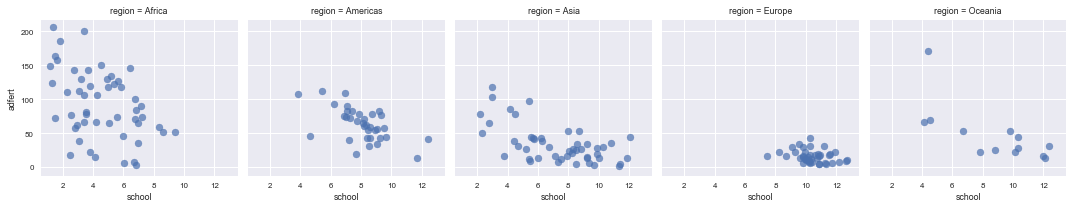

In [58]:
grouped_scatterplot_v2(df, 'school', 'adfert', 'region')

In [60]:
##----------------------------------------------------------
## Ejercicio 3: Genere un heatmap entre todas las variables.

In [68]:
df_subsample_02= df.loc[:,['country', 'region','chldmort', 'adfert','life']]
df_subsample_02 = df_subsample_02.dropna()

In [69]:
corr_mat = df_subsample_02.corr()

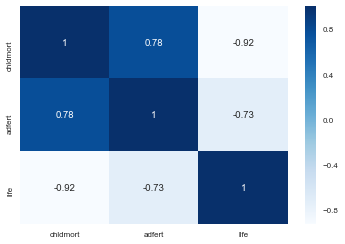

In [70]:
sns.heatmap(corr_mat, cmap='Blues', annot=True);

In [71]:
# La principal correlación se encuentra entre la fertilidad y la mortalidad infantil.Mientras más
#personas nacen más aumenta la muerte en niños.

In [72]:
## Ejercicio 4: En base a las principales correlaciones, 
#sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

In [73]:
wvs_subset = df.loc[: , 'country':'gini']

In [77]:
wvs_subset = wvs_subset.dropna()
region_by = wvs_subset['region'].unique()

In [78]:
region_by

array(['Africa', 'Americas', 'Asia', 'Europe'], dtype=object)

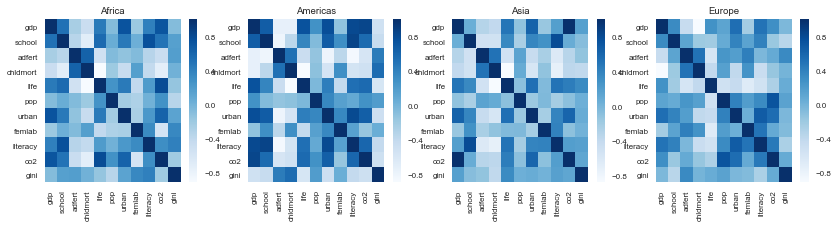

In [138]:
fig, axn = plt.subplots(1, len(region_by), figsize=(14, 3))
axn.flat
i=0
for a, ax in enumerate(axn.flat):
    tmp_heatmap_region = wvs_subset[wvs_subset['region'] == region_by[i]] #Obtener la región
    axn[i].set_title(region_by[i])
    corr_mat = tmp_heatmap_region.corr()
    sns.heatmap(corr_mat, cmap='Blues', ax=ax)
    i= i+1


In [141]:
#En Africa está altammente correlacionado el nivel de alfabetización con el nivel de escolaridad.
#En America etá altamete correlacionado el nivel de alfabetización con escolaridad y urbanización.
#En Asia está altamente correlacionado C02 con con el producto interno brutoo
#En Europa no se ven correlaciones muy altas, se puede ver entre Pop y C02 o entre alfabetización y urbanizmo


In [144]:
clear
